<a href="https://colab.research.google.com/github/owen-simon/IS-6482-data-mining/blob/main/Week%203/A2_Simon_Owen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 — Data Exploration

**Created:** 2026-02-12

**Author:** Owen Simon

---

## Task 1

### Task 1a

In [1]:
# Load Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Make results reproducible
RANDOM_STATE = 42

### Task 1b

In [2]:
# Read file
CD = "https://raw.githubusercontent.com/owen-simon/IS-6482-data-mining/main/Week%203/CD_additional_balanced.csv"
df = pd.read_csv(CD)

### Task 1c

In [3]:
# Overall data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   int64  
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   int64  
 11  campaign        9280 non-null   int64  
 12  pdays           9280 non-null   int64  
 13  previous        9280 non-null   int64  
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

### Task 1d

In [4]:
# transform from object to category
object_cols = df.select_dtypes(include=["object"]).columns.tolist()
df[object_cols] = df[object_cols].astype("category")

#  confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             9280 non-null   int64   
 1   job             9280 non-null   category
 2   marital         9280 non-null   category
 3   education       9280 non-null   category
 4   default         9280 non-null   category
 5   housing         9280 non-null   category
 6   loan            9280 non-null   category
 7   contact         9280 non-null   category
 8   month           9280 non-null   category
 9   day_of_week     9280 non-null   category
 10  duration        9280 non-null   int64   
 11  campaign        9280 non-null   int64   
 12  pdays           9280 non-null   int64   
 13  previous        9280 non-null   int64   
 14  poutcome        9280 non-null   category
 15  emp.var.rate    9280 non-null   float64 
 16  cons.price.idx  9280 non-null   float64 
 17  cons.conf.idx 

## Task 2

In [5]:
target_summary = (
    df['y']
    .value_counts()
    .to_frame(name='Count')
)

target_summary['Proportion'] = target_summary['Count'] / target_summary['Count'].sum()

target_summary

,Count,Proportion
y,,
no,4640,0.5
yes,4640,0.5


## Task 3

In [6]:
# Define X and y variables
y = df["y"]
X = df.drop(columns=["y", "duration"])   # Exclude duration as a predictor

In [7]:
# Change categorical variables to booleans
X_encoded = X.copy()
X_encoded = pd.get_dummies(X, drop_first=True)

# Verify boolean transformation
X_encoded.head()


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,41,1,999,0,1.1,93.994,-36.4,4.857,5191.0,True,...,True,False,False,False,True,False,False,False,True,False
1,49,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
2,49,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
3,41,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
4,45,1,999,0,1.1,93.994,-36.4,4.857,5191.0,True,...,True,False,False,False,True,False,False,False,True,False


### Task 3a

In [8]:
# Partition data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.30,
    random_state=RANDOM_STATE,
    stratify=y
)

### Task 3b

In [9]:
# Training set summary
train_summary = (
    y_train
    .value_counts()
    .to_frame(name="Count")
)
train_summary["Proportion"] = train_summary["Count"] / train_summary["Count"].sum()

# Test set summary
test_summary = (
    y_test
    .value_counts()
    .to_frame(name="Count")
)
test_summary["Proportion"] = test_summary["Count"] / test_summary["Count"].sum()

print("Training set target distribution:")
display(train_summary)

print("\nTest set target distribution:")
display(test_summary)

Training set target distribution:


,Count,Proportion
y,,
no,3248,0.5
yes,3248,0.5



Test set target distribution:


,Count,Proportion
y,,
no,1392,0.5
yes,1392,0.5


## Task 4

In [10]:
ccp_alphas = [0.97, 0.35, 0.125, 0.08, 0.045, 0.025, 0.01]

clfs = []
train_scores = []
test_scores = []

for alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

## Task 5

### Task 5a

In [11]:
for alpha, clf in zip(ccp_alphas, clfs):
    print(f"ccp_alpha={alpha:.3f} | depth={clf.get_depth()} | leaf nodes={clf.get_n_leaves()}")

ccp_alpha=0.970 | depth=0 | leaf nodes=1
ccp_alpha=0.350 | depth=0 | leaf nodes=1
ccp_alpha=0.125 | depth=0 | leaf nodes=1
ccp_alpha=0.080 | depth=1 | leaf nodes=2
ccp_alpha=0.045 | depth=1 | leaf nodes=2
ccp_alpha=0.025 | depth=1 | leaf nodes=2
ccp_alpha=0.010 | depth=2 | leaf nodes=3


###  Task 5b

**Most complex tree:** smallest `ccp_alpha` → least pruning → most leaf nodes → can overfit

**Least complex tree:** largest `ccp_alpha` → most pruning → fewest leaf nodes → can underfit

### Task 5c

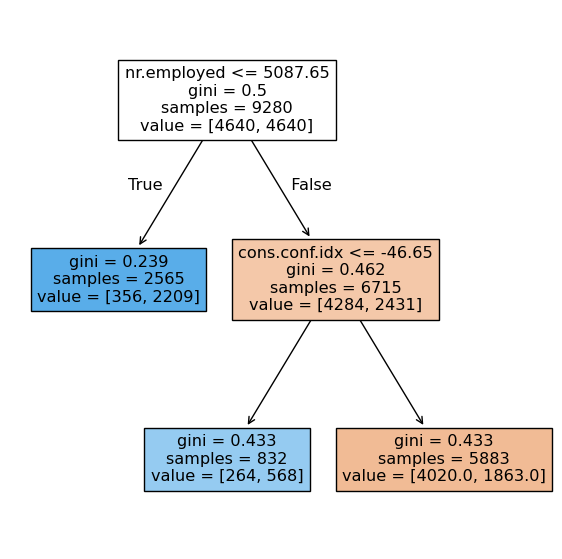

In [12]:
tree_alpha_low  = 0.01

tree_model_complex = tree.DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    ccp_alpha=tree_alpha_low,

)
tree_model_complex.fit(X_encoded, y)
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_complex,
                   feature_names=X_encoded.columns.to_list(),
                   filled=True)